<a href="https://colab.research.google.com/github/NourhanZahran/Colab-notes/blob/main/Copy_of_SMOTE_LRRK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("ESTATEFP_best.csv")


X = df.drop("label",axis=1)

y = df["label"]

In [ ]:
X.head()

,EStateFP7,EStateFP8,EStateFP9,EStateFP10,EStateFP11,EStateFP13,EStateFP15,EStateFP16,EStateFP17,EStateFP18,...,EStateFP36,EStateFP37,EStateFP38,EStateFP46,EStateFP50,EStateFP51,EStateFP53,EStateFP54,EStateFP70,EStateFP75
0,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,1,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split,cross_validate

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,matthews_corrcoef,roc_auc_score,make_scorer,auc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

1    1732
0     198
Name: label, dtype: int64

In [ ]:
smote = SMOTE(random_state=42,sampling_strategy=0.5)

In [ ]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

1    1732
0     866
Name: label, dtype: int64

In [ ]:
SN = make_scorer(recall_score)

SP = make_scorer(recall_score,pos_label=0)


Q = make_scorer(accuracy_score)

MCC = make_scorer(matthews_corrcoef)


scoring = {"SN":SN,"SP":SP,"Q":Q,"MCC":MCC}

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
cv_results = pd.DataFrame(cross_validate(rf,X_train,y_train,cv=10,scoring=scoring))

In [ ]:
cv_results.describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,0.262332,0.013665,0.248492,0.254517,0.259594,0.266403,0.295174
score_time,10.0,0.024881,0.001139,0.023860,0.024124,0.024415,0.025320,0.026881
test_SN,10.0,0.888569,0.020206,0.861272,0.874277,0.884742,0.896402,0.930636
test_SP,10.0,0.866881,0.121736,0.639535,0.781275,0.925287,0.953889,0.977011
test_Q,10.0,0.881458,0.045002,0.811538,0.839315,0.899814,0.907692,0.938462
test_MCC,10.0,0.740835,0.110032,0.561276,0.642838,0.792248,0.811321,0.866871


In [ ]:
rf.fit(X_train,y_train)

yHat_train= rf.predict(X_train)

yHat_test = rf.predict(X_test)



In [ ]:
print(recall_score(y_train,yHat_train)) #SN
print(recall_score(y_train,yHat_train,pos_label=0)) #SP
print(matthews_corrcoef(y_train,yHat_train)) #MCC
print(accuracy_score(y_train,yHat_train)) # Q

0.9272517321016166
0.9237875288683602
0.8376427921922228
0.9260969976905312


In [ ]:
print(recall_score(y_test,yHat_test))
print(recall_score(y_test,yHat_test,pos_label=0))
print(matthews_corrcoef(y_test,yHat_test))
print(accuracy_score(y_test,yHat_test))
print(roc_auc_score(y_test,rf.predict_proba(X_test)[:, 1]))


0.8850574712643678
0.5
0.3198256474320862
0.8467908902691511
0.8187260536398467


In [ ]:
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay,classification_report

In [ ]:
import matplotlib.pyplot as plt


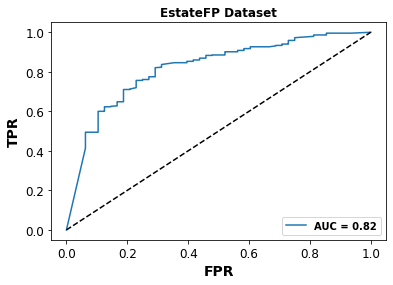

In [ ]:


RocCurveDisplay.from_estimator(rf,X_test,y_test)
plt.plot([0,1],[0,1],"--k")

plt.xlabel("FPR",weight="bold",size=14)
plt.ylabel("TPR",weight="bold",size=14)
plt.xticks(size=12)
plt.yticks(size=12)


plt.title("EstateFP Dataset",weight="bold")
legend_properties = {'weight':'bold'}


plt.legend(["AUC = 0.82"],prop=legend_properties,loc="lower right")

plt.savefig("EstateFP ROC.tiff",dpi=300)

plt.show()


In [ ]:
print(classification_report(y_test,yHat_test))

              precision    recall  f1-score   support

           0       0.32      0.50      0.39        48
           1       0.94      0.89      0.91       435

    accuracy                           0.85       483
   macro avg       0.63      0.69      0.65       483
weighted avg       0.88      0.85      0.86       483



In [ ]:
cm = confusion_matrix(y_test,yHat_test)

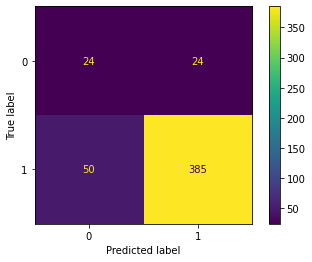

In [ ]:
disp = ConfusionMatrixDisplay(cm)

disp.plot()

In [ ]:
import pickle

In [ ]:
pickle.dump(rf, open('lrrk2_model.pkl', 'wb'))


In [ ]:
pickled_model = pickle.load(open('lrrk2_model.pkl', 'rb'))

In [ ]:
feat_imp = pd.Series(rf.feature_importances_,index=X.columns).nlargest(15)

In [ ]:
feat_imp

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x =feat_imp,y = feat_imp.index,palette="cool")

plt.xlabel("Gini Index",weight="bold",size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()

plt.savefig("feat_importance.png",dpi=300)
plt.show()

In [ ]:
df = pd.read_csv("APFP_best.csv")


X = df.drop("label",axis=1)

y = df["label"]

In [ ]:
from sklearn.model_selection import train_test_split,cross_validate

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,matthews_corrcoef,roc_auc_score,make_scorer,auc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

1    1732
0     198
Name: label, dtype: int64

In [ ]:
smote = SMOTE(random_state=42,sampling_strategy=0.5)

In [ ]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

1    1732
0     866
Name: label, dtype: int64

In [ ]:
SN = make_scorer(recall_score)

SP = make_scorer(recall_score,pos_label=0)


Q = make_scorer(accuracy_score)

MCC = make_scorer(matthews_corrcoef)


scoring = {"SN":SN,"SP":SP,"Q":Q,"MCC":MCC}

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
cv_results = pd.DataFrame(cross_validate(rf,X_train,y_train,cv=10,scoring=scoring))

In [ ]:
rf.fit(X_train,y_train)

yHat_train= rf.predict(X_train)

yHat_test = rf.predict(X_test)



In [ ]:
print(recall_score(y_train,yHat_train)) #SN
print(recall_score(y_train,yHat_train,pos_label=0)) #SP
print(matthews_corrcoef(y_train,yHat_train)) #MCC
print(accuracy_score(y_train,yHat_train)) # Q

0.9653579676674365
0.953810623556582
0.9140276306366831
0.9615088529638183


In [ ]:
print(recall_score(y_test,yHat_test))
print(recall_score(y_test,yHat_test,pos_label=0))
print(matthews_corrcoef(y_test,yHat_test))
print(accuracy_score(y_test,yHat_test))
print(roc_auc_score(y_test,rf.predict_proba(X_test)[:, 1]))


0.9310344827586207
0.4583333333333333
0.3758244162199131
0.8840579710144928
0.8724377394636015


In [ ]:
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay,classification_report

In [ ]:
import matplotlib.pyplot as plt



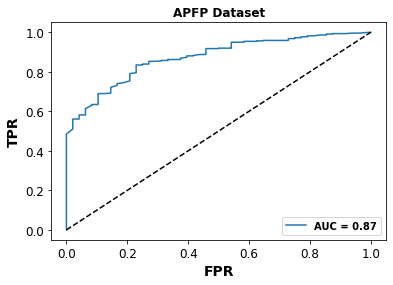

In [ ]:


RocCurveDisplay.from_estimator(rf,X_test,y_test)
plt.plot([0,1],[0,1],"--k")

plt.xlabel("FPR",weight="bold",size=14)
plt.ylabel("TPR",weight="bold",size=14)
plt.xticks(size=12)
plt.yticks(size=12)


plt.title("APFP Dataset",weight="bold")
legend_properties = {'weight':'bold'}


plt.legend(["AUC = 0.87"],prop=legend_properties,loc="lower right")

plt.savefig("APFP ROC.tiff",dpi=300)

plt.show()
